# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the dataset

In [ ]:
# dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Machine+Learning+A-Z+(Codes+and+Datasets).zip (Unzipped Files)/Machine+Learning+A-Z+(Codes+and+Datasets)/Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)/Python/Social_Network_Ads.csv')
dataset = pd.read_csv('/content/drive/MyDrive/191CS263_Lab_6_Assignment/Copy of haberman.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[60 65  0]
 [62 59 13]
 [67 64  8]
 [38 62  3]
 [65 67  1]
 [65 67  0]
 [39 59  2]
 [48 67  7]
 [58 67  0]
 [61 64  0]
 [48 58 11]
 [53 65 12]
 [54 65 23]
 [70 68  0]
 [73 68  0]
 [52 64  0]
 [51 59 13]
 [63 63  0]
 [44 63  1]
 [52 62  0]
 [66 61 13]
 [61 59  0]
 [61 59  0]
 [70 66 14]
 [41 67  0]
 [62 65 19]
 [64 58  0]
 [57 64  1]
 [53 63 24]
 [70 58  4]
 [52 63  4]
 [42 58  0]
 [52 61  0]
 [37 63  0]
 [83 58  2]
 [45 65  6]
 [52 65  0]
 [42 59  2]
 [43 66  4]
 [67 66  0]
 [64 66  0]
 [59 62 35]
 [72 64  0]
 [60 61  1]
 [53 58  1]
 [54 60 11]
 [39 66  0]
 [45 67  0]
 [51 65  0]
 [59 60  0]
 [49 60  1]
 [50 66  1]
 [70 58  0]
 [48 62  2]
 [36 69  0]
 [44 61  0]
 [48 61  8]
 [65 59  2]
 [54 65  5]
 [33 58 10]
 [47 62  0]
 [54 67 46]
 [43 58 52]
 [43 64  3]
 [52 66  4]
 [59 64  1]
 [53 60  9]
 [69 66  0]
 [40 58  0]
 [56 67  0]
 [35 64 13]
 [48 58 11]
 [57 64  0]
 [31 65  4]
 [53 61  1]
 [50 59  0]
 [38 59  2]
 [38 66 11]
 [44 61  0]
 [69 60  0]
 [74 63  0]
 [37 58  0]
 [65 62 22]
 [62

In [ ]:
print(y_train)

[2 2 2 1 1 1 1 2 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 1 1 1 1 2 2 1
 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 2 1 1 1 1 1
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 2 1
 1 1 1 2 2 2 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1
 1 1 1 1 1 1]


In [ ]:
print(X_test)

[[42 63  1]
 [42 69  1]
 [42 65  0]
 [51 59  3]
 [75 62  1]
 [49 67  1]
 [59 63  0]
 [42 60  1]
 [49 62  0]
 [57 64  9]
 [38 60  0]
 [63 63  0]
 [59 67  3]
 [46 62  0]
 [56 66  3]
 [61 68  1]
 [46 69  3]
 [47 65  0]
 [56 65  9]
 [36 60  1]
 [53 59  3]
 [37 63  0]
 [34 60  0]
 [58 58  3]
 [63 61  9]
 [45 67  1]
 [50 64  0]
 [64 65 22]
 [55 66 18]
 [65 58  0]
 [50 64  0]
 [44 58  9]
 [52 68  0]
 [55 58  1]
 [50 58  1]
 [54 60  3]
 [53 65  1]
 [37 60  0]
 [47 60  4]
 [34 58 30]
 [57 67  0]
 [61 62  5]
 [43 64  0]
 [46 62  5]
 [56 60  0]
 [61 65  8]
 [50 65  4]
 [33 60  0]
 [44 63 19]
 [62 58  0]
 [73 62  0]
 [39 63  0]
 [43 64  0]
 [55 63  6]
 [37 60 15]
 [63 61  0]
 [34 66  9]
 [41 58  0]
 [57 69  0]
 [55 69 22]
 [62 66  0]
 [50 61  6]
 [43 64  2]
 [47 67  0]
 [54 69  7]
 [63 62  0]
 [51 64  7]
 [54 63 19]
 [48 64  0]
 [74 65  3]
 [70 59  8]
 [70 63  0]
 [55 58  0]
 [38 66  0]
 [60 59 17]
 [37 59  6]
 [41 59  8]]


In [ ]:
print(y_test)

[1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2
 1 1 1 1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 6.46626681e-01  6.61572977e-01 -5.37195370e-01]
 [ 8.30800177e-01 -1.18920787e+00  1.20677733e+00]
 [ 1.29123392e+00  3.53109503e-01  5.36018601e-01]
 [-1.37928177e+00 -2.63817445e-01 -1.34740131e-01]
 [ 1.10706042e+00  1.27849992e+00 -4.03043624e-01]
 [ 1.10706042e+00  1.27849992e+00 -5.37195370e-01]
 [-1.28719502e+00 -1.18920787e+00 -2.68891878e-01]
 [-4.58414293e-01  1.27849992e+00  4.01866854e-01]
 [ 4.62453185e-01  1.27849992e+00 -5.37195370e-01]
 [ 7.38713429e-01  3.53109503e-01 -5.37195370e-01]
 [-4.58414293e-01 -1.49767134e+00  9.38473840e-01]
 [ 2.01944622e-03  6.61572977e-01  1.07262559e+00]
 [ 9.41061940e-02  6.61572977e-01  2.54829480e+00]
 [ 1.56749416e+00  1.58696340e+00 -5.37195370e-01]
 [ 1.84375440e+00  1.58696340e+00 -5.37195370e-01]
 [-9.00673016e-02  3.53109503e-01 -5.37195370e-01]
 [-1.82154049e-01 -1.18920787e+00  1.20677733e+00]
 [ 9.22886924e-01  4.46460291e-02 -5.37195370e-01]
 [-8.26761284e-01  4.46460291e-02 -4.03043624e-01]
 [-9.00673016e-02 -2.63817445e-

In [ ]:
print(X_test)

[[-1.01093478e+00  4.46460291e-02 -4.03043624e-01]
 [-1.01093478e+00  1.89542687e+00 -4.03043624e-01]
 [-1.01093478e+00  6.61572977e-01 -5.37195370e-01]
 [-1.82154049e-01 -1.18920787e+00 -1.34740131e-01]
 [ 2.02792790e+00 -2.63817445e-01 -4.03043624e-01]
 [-3.66327545e-01  1.27849992e+00 -4.03043624e-01]
 [ 5.54539933e-01  4.46460291e-02 -5.37195370e-01]
 [-1.01093478e+00 -8.80744393e-01 -4.03043624e-01]
 [-3.66327545e-01 -2.63817445e-01 -5.37195370e-01]
 [ 3.70366437e-01  3.53109503e-01  6.70170347e-01]
 [-1.37928177e+00 -8.80744393e-01 -5.37195370e-01]
 [ 9.22886924e-01  4.46460291e-02 -5.37195370e-01]
 [ 5.54539933e-01  1.27849992e+00 -1.34740131e-01]
 [-6.42587788e-01 -2.63817445e-01 -5.37195370e-01]
 [ 2.78279690e-01  9.70036451e-01 -1.34740131e-01]
 [ 7.38713429e-01  1.58696340e+00 -4.03043624e-01]
 [-6.42587788e-01  1.89542687e+00 -1.34740131e-01]
 [-5.50501041e-01  6.61572977e-01 -5.37195370e-01]
 [ 2.78279690e-01  6.61572977e-01  6.70170347e-01]
 [-1.56345527e+00 -8.80744393e-

## Training the K-NN model on the Training set

In [ ]:
class KNN:
    def __init__(self,X_train,Y_train,K):
        self.X_train = X_train
        self.Y_train = Y_train
        self.K = K
        
    def predict(self,X):
        # y_pred = np.array([])
        y_pred = []
        # print(y_pred)
        for each in X:
            ed = np.sum((each-self.X_train)**2,axis=1)
            y_ed = np.concatenate((self.Y_train.reshape(self.Y_train.shape[0],1), ed.reshape(ed.shape[0],1)),axis=1)
            y_ed = y_ed[y_ed[:,1].argsort()]
            K_neighbours = y_ed[0:self.K]
            (values,counts) = np.unique(K_neighbours[:,0].astype(int),return_counts=True)
            # print(np.argmax(counts))
            # print(values[np.argmax(counts)])
            # y_pred = np.append(y_pred, values[np.argmax(counts)])
            y_pred.append(values[np.argmax(counts)])
        return np.array(y_pred)
            


# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

classifier = KNN(X_train,y_train, 5)
# y_pred=knn.predict(X_test)


## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[56,60, 0]])))

[1]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [2 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 2]
 [1 1]
 [2 1]
 [2 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [2 1]
 [2 1]
 [1 1]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 2]
 [2 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[42 12]
 [20  3]]


0.5844155844155844

Using Libraries

48


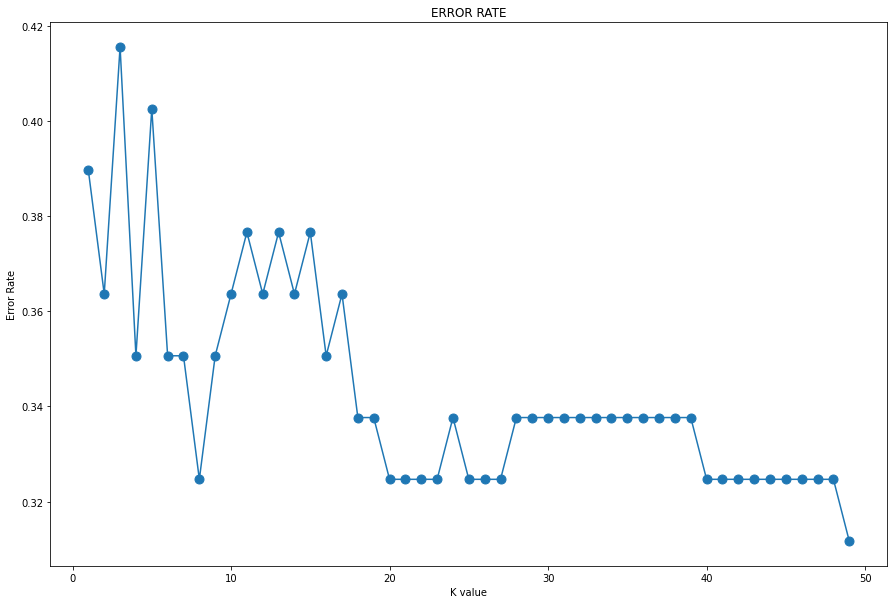

In [ ]:
error_rate = []
# min_i = 100;
for i in range(1,50):
    knn = KNN(X_train, y_train,i)
    # knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
plt.figure(figsize=(15,10))
plt.title("ERROR RATE")
plt.plot(range(1,50),error_rate, marker='o', markersize=9)
plt.xlabel("K value")
plt.ylabel("Error Rate")
print(error_rate.index(min(error_rate)))
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

In [ ]:
# print(classifier.predict(sc.transform([[30,87000]])))

In [ ]:
classifier = KNN(X_train,y_train, 48)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [2 1]
 [2 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[51  3]
 [22  1]]


0.6753246753246753

In [ ]:
# y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

## Visualising the Training set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

KeyboardInterrupt: ignored

## Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: ignored